# <출근시간대 지하철 혼잡도를 이용하여 도시 내부 구조 분석하기>
### 2조 - 10122 한상은, 10617 정민서

#### - 주제 선정 이유
고등학교 진학 후 지하철을 이용하여 등하교하면서 되어 혼잡한 지하철을 타는 일이 잦아지게 되어 어느 역에서 사람들이 많이 승차하고 하차하는 지에 대한 호기심으로 이 주제를 떠올리게 됨.

## 0. 데이터 준비

In [17]:
import folium
import pandas as pd

Seoul_subway = pd.read_csv('Seoul_subway.csv', encoding = 'cp949')
subway_location = pd.read_csv('subway_location.csv', encoding = 'cp949')

In [18]:
df = pd.DataFrame(Seoul_subway)
start = [37.554648, 126.972559]
m1 = folium.Map(location=start, zoom_start=10)
m2 = folium.Map(location=start, zoom_start=11)
df

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202206,1호선,동대문,890,31,11300,2056,8821,7698,14163,...,8677,25,1595,0,0,0,0,0,0,20220703
1,202206,1호선,동묘앞,170,3,2827,1104,3321,5042,6249,...,3604,31,2129,0,0,1,0,0,0,20220703
2,202206,1호선,서울역,646,24,8433,7694,12608,46963,39233,...,15480,158,1332,1,4,0,1,0,0,20220703
3,202206,1호선,시청,271,7,3133,4802,3321,23621,6647,...,2938,72,422,0,2,0,0,0,0,20220703
4,202206,1호선,신설동,370,19,8467,2653,8568,11348,18684,...,7832,232,1578,1,12,0,0,0,0,20220703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53261,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
53262,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
53263,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
53264,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223


## 1. 데이터 전처리

In [19]:
filt = df['사용월'] < 202206  #2022년 6월 데이터만 사용
df.drop(index = df[filt].index,inplace=True) #출근시간대 승하차인원 데이터만 사용
df.drop(df.columns[3:9],axis =1,inplace=True)
df.drop(df.columns[7:], axis=1,inplace=True)
df

,사용월,호선명,지하철역,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원
0,202206,1호선,동대문,14163,12675,18873,22464
1,202206,1호선,동묘앞,6249,9730,9677,22640
2,202206,1호선,서울역,39233,100397,65106,201687
3,202206,1호선,시청,6647,62427,8294,179710
4,202206,1호선,신설동,18684,23149,26419,56781
...,...,...,...,...,...,...,...
610,202206,중앙선,원덕,976,601,1152,861
611,202206,중앙선,중랑,23142,3184,21780,6304
612,202206,중앙선,지평,380,425,240,162
613,202206,중앙선,팔당,1642,1809,1449,3480


In [20]:
pd.set_option('mode.chained_assignment',  None)

In [21]:
#역 별 승하차 인원 비율 구하기

#승차
df['07-09시 승차인원'] = df['07시-08시 승차인원'] + df['08시-09시 승차인원']
people = 0
for i in df['07-09시 승차인원']:
    people += i
df['승차비율'] = round(df['07-09시 승차인원'] / people *100, 2)

#하차
df['07-09시 하차인원'] = df['07시-08시 하차인원'] + df['08시-09시 하차인원']
people = 0
for i in df['07-09시 하차인원']:
    people += i
df['하차비율'] = round(df['07-09시 하차인원'] / people *100, 2)
df

,사용월,호선명,지하철역,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,07-09시 승차인원,승차비율,07-09시 하차인원,하차비율
0,202206,1호선,동대문,14163,12675,18873,22464,33036,0.10,35139,0.11
1,202206,1호선,동묘앞,6249,9730,9677,22640,15926,0.05,32370,0.11
2,202206,1호선,서울역,39233,100397,65106,201687,104339,0.32,302084,0.99
3,202206,1호선,시청,6647,62427,8294,179710,14941,0.05,242137,0.79
4,202206,1호선,신설동,18684,23149,26419,56781,45103,0.14,79930,0.26
...,...,...,...,...,...,...,...,...,...,...,...
610,202206,중앙선,원덕,976,601,1152,861,2128,0.01,1462,0.00
611,202206,중앙선,중랑,23142,3184,21780,6304,44922,0.14,9488,0.03
612,202206,중앙선,지평,380,425,240,162,620,0.00,587,0.00
613,202206,중앙선,팔당,1642,1809,1449,3480,3091,0.01,5289,0.02


In [22]:
#중복 항목 제거
df.drop_duplicates(['지하철역'], inplace=True)  
df.reset_index(inplace=True)
df.drop(df.columns[0],axis =1,inplace=True)

#좌표 값 옮기기
df['x'] = 0
df['y'] = 0

for i in range(len(df['지하철역'])):    #역 좌표 데이터에서 데이터 프레임으로 좌표값 옮기기
    n = df['지하철역'][i]
    for j in range(len(subway_location['역이름'])):
        k = subway_location['역이름'][j]
        if n == k:
            df['호선명'][i] = subway_location['호선'][j]
            df['x'][i] = subway_location['x'][j]
            df['y'][i] = subway_location['y'][j]
df

,사용월,호선명,지하철역,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,07-09시 승차인원,승차비율,07-09시 하차인원,하차비율,x,y
0,202206,1호선,동대문,14163,12675,18873,22464,33036,0.10,35139,0.11,127.009745,37.571420
1,202206,6호선,동묘앞,6249,9730,9677,22640,15926,0.05,32370,0.11,127.016429,37.572627
2,202206,1호선,서울역,39233,100397,65106,201687,104339,0.32,302084,0.99,126.972559,37.554648
3,202206,1호선,시청,6647,62427,8294,179710,14941,0.05,242137,0.79,126.977108,37.564718
4,202206,1호선,신설동,18684,23149,26419,56781,45103,0.14,79930,0.26,127.025087,37.575297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,202206,중앙선,원덕,976,601,1152,861,2128,0.01,1462,0.00,0.000000,0.000000
520,202206,중앙선,중랑,23142,3184,21780,6304,44922,0.14,9488,0.03,0.000000,0.000000
521,202206,중앙선,지평,380,425,240,162,620,0.00,587,0.00,0.000000,0.000000
522,202206,중앙선,팔당,1642,1809,1449,3480,3091,0.01,5289,0.02,0.000000,0.000000


In [23]:
#1~9호선 외에 다른 호선 제거하기 ex) 경의선, 분당선...

filt = (df['호선명']!='1호선') & (df['호선명']!='2호선') & (df['호선명']!='3호선') & (df['호선명']!='4호선')&(df['호선명']!='5호선') & (df['호선명']!='6호선') & (df['호선명']!='7호선') & (df['호선명']!='8호선')& (df['호선명']!='9호선')
df.drop(index=df[filt].index,inplace=True)
df.reset_index(inplace=True)
df.drop(df.columns[0],axis =1,inplace=True)
df

,사용월,호선명,지하철역,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,07-09시 승차인원,승차비율,07-09시 하차인원,하차비율,x,y
0,202206,1호선,동대문,14163,12675,18873,22464,33036,0.10,35139,0.11,127.009745,37.571420
1,202206,6호선,동묘앞,6249,9730,9677,22640,15926,0.05,32370,0.11,127.016429,37.572627
2,202206,1호선,서울역,39233,100397,65106,201687,104339,0.32,302084,0.99,126.972559,37.554648
3,202206,1호선,시청,6647,62427,8294,179710,14941,0.05,242137,0.79,126.977108,37.564718
4,202206,1호선,신설동,18684,23149,26419,56781,45103,0.14,79930,0.26,127.025087,37.575297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,202206,1호선,신창(순천향대),2538,2443,1956,8048,4494,0.01,10491,0.03,126.951108,36.769502
381,202206,1호선,쌍용(나사렛대),6542,1620,7383,6337,13925,0.04,7957,0.03,127.121400,36.793759
382,202206,1호선,아산,5727,5661,7177,8290,12904,0.04,13951,0.05,127.104361,36.792053
383,202206,1호선,온양온천,8863,5408,9738,8169,18601,0.06,13577,0.04,127.003249,36.780483


## 2. 데이터 그래프 시각화

In [24]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['axes.unicode_minus'] = False

def subway_colors(a):  #지하철 색상 함수
    for i in a:
        if(i=='1호선'): colors.append('#0052A4')
        elif (i == '2호선'): colors.append('#009D3E')
        elif(i=='3호선'): colors.append('#EF7C1C')
        elif(i=='4호선'): colors.append('#00A5DE')
        elif(i == '5호선'): colors.append('#996CAC')
        elif(i == '6호선'): colors.append('#CD7C2F')
        elif(i == '7호선'): colors.append('#747F00')
        elif(i == '8호선'): colors.append('#EA545D')
        elif(i == '9호선'): colors.append('#BDB092')
        else: colors.append('#CCCCCC')

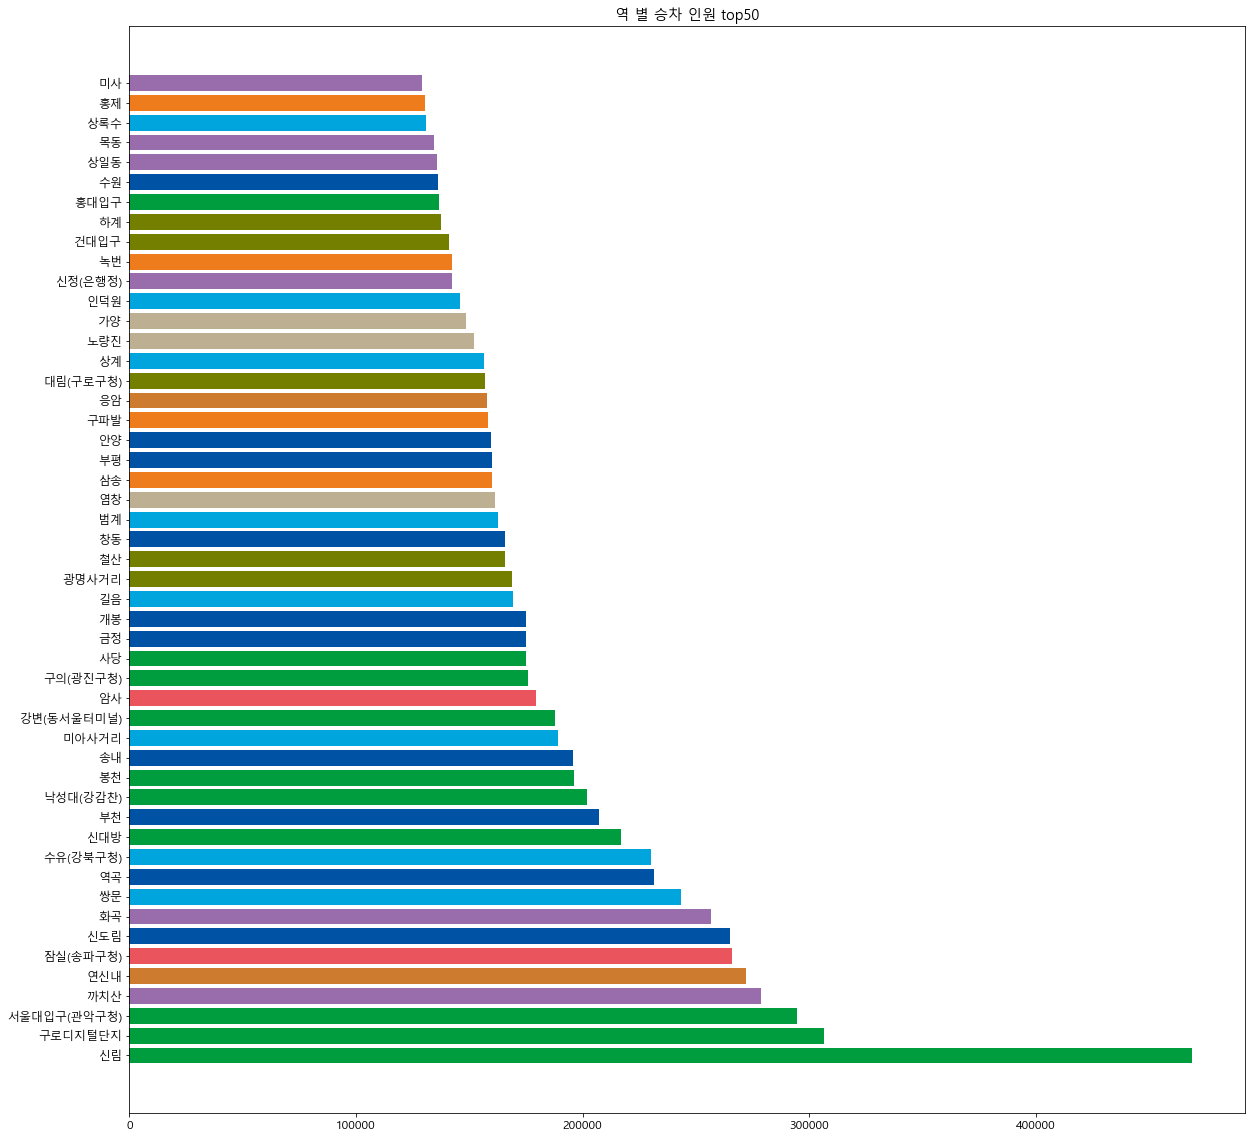

In [25]:
#역 별 승차 인원
top50_seungcha = df.sort_values('07-09시 승차인원',ascending=False)
colors = []

plt.figure(figsize = (20,20))
plt.title('역 별 승차 인원 top50')
subway_colors(top50_seungcha['호선명'][:50])
plt.barh(top50_seungcha['지하철역'][:50],top50_seungcha['07-09시 승차인원'][:50],color = colors)

plt.show()

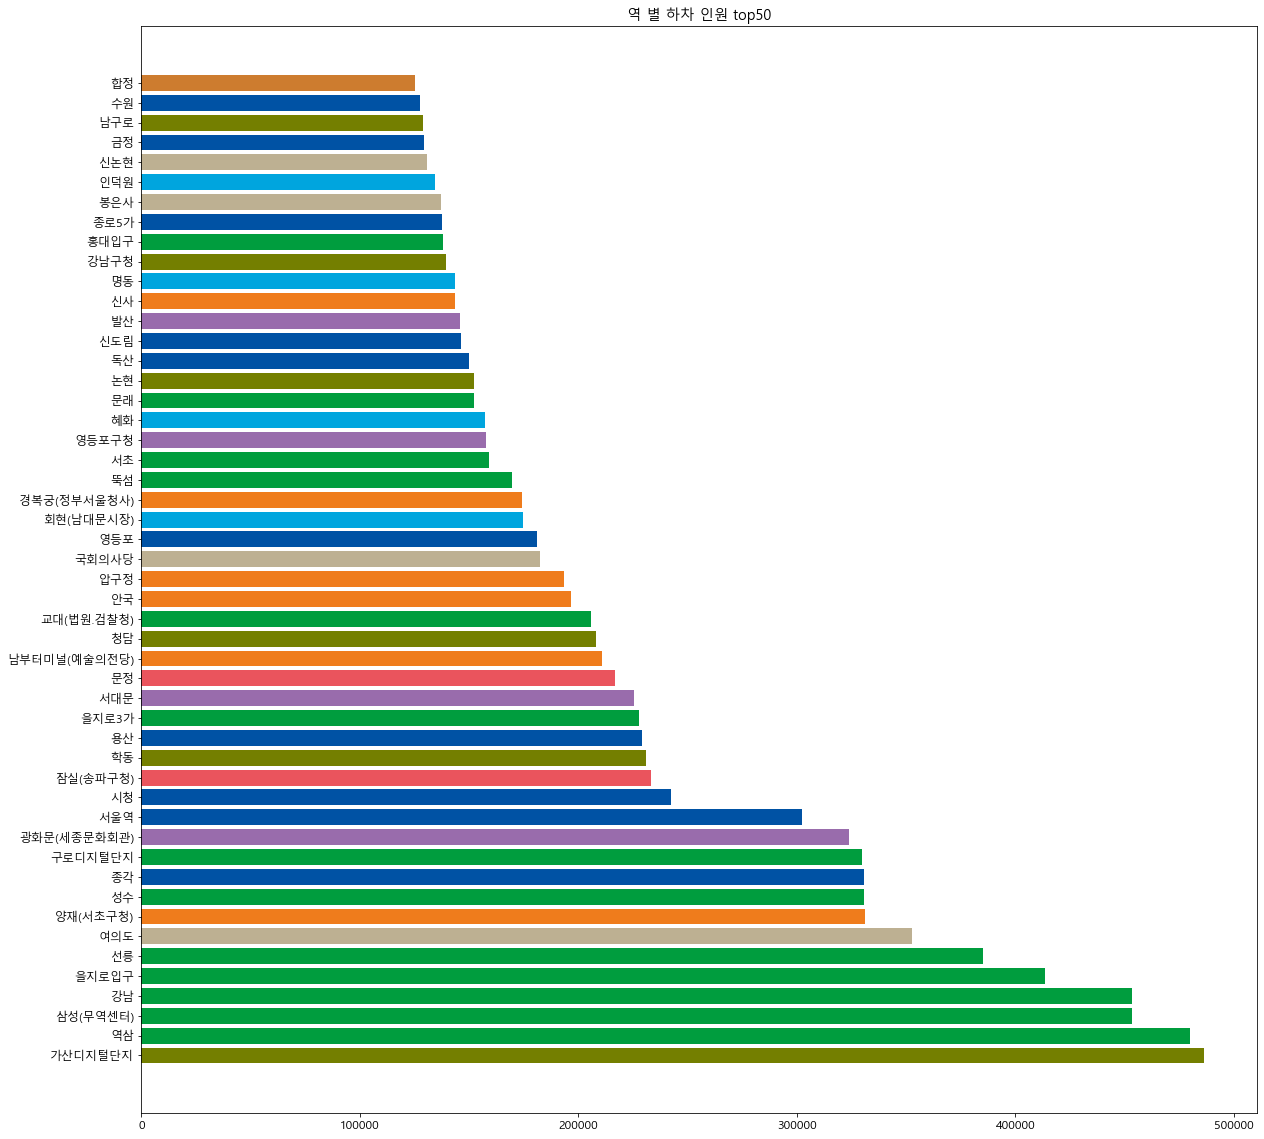

In [26]:
#역 별 하차 인원
top50_hacha = df.sort_values('07-09시 하차인원',ascending=False)
colors = []

plt.figure(figsize = (20,20))
plt.title('역 별 하차 인원 top50')
subway_colors(top50_hacha['호선명'][:50])
plt.barh(top50_hacha['지하철역'][:50],top50_hacha['07-09시 하차인원'][:50],color = colors)

plt.show()

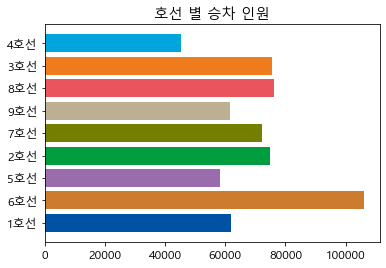

<Figure size 1440x1440 with 0 Axes>

In [27]:
#호선 별 승차
grp = df.groupby('호선명')
colors= []
subway_colors(df['호선명'].unique())

plt.barh(df['호선명'].unique(),grp.mean()['07-09시 승차인원'],color = colors)
plt.title('호선 별 승차 인원')
plt.figure(figsize = (20,20))
plt.show()

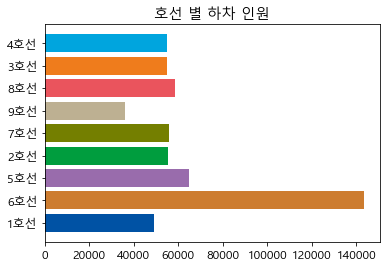

<Figure size 1440x1440 with 0 Axes>

In [28]:
#호선 별하차
plt.barh(df['호선명'].unique(),grp.mean()['07-09시 하차인원'],color = colors)
plt.title('호선 별 하차 인원')
plt.figure(figsize = (20,20))
plt.show()

## 3. 데이터 지도 시각화

In [29]:
#승차인원.ver
for i in range(len(df['지하철역'])):
    if df['승차비율'][i] == 0:
            continue
    xy = [df['y'][i], df['x'][i]]
    if df['호선명'][i] == '1호선':
        folium.CircleMarker(xy,
                            radius=16*df['승차비율'][i],
                            fill = True,
                            color = '#0052A4',
                            fill_color = '#0052A4',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 승차인원'][i]//30)).add_to(m1)
    
    elif df['호선명'][i] == '2호선':
        folium.CircleMarker(xy,
                            radius=16*df['승차비율'][i],
                            fill = True,
                            color = '#00B140',
                            fill_color = '#00B140',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 승차인원'][i]//30)).add_to(m1)
        
    elif df['호선명'][i] == '3호선':
        folium.CircleMarker(xy,
                            radius=16*df['승차비율'][i],
                            fill = True,
                            color = '#EF7C1C',
                            fill_color = '#EF7C1C',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 승차인원'][i]//30)).add_to(m1)
        
    elif df['호선명'][i] == '4호선':
        folium.CircleMarker(xy,
                            radius=16*df['승차비율'][i],
                            fill = True,
                            color = '#30E6FF',
                            fill_color = '#30E6FF',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 승차인원'][i]//30)).add_to(m1)
        
    elif df['호선명'][i] == '5호선':
        folium.CircleMarker(xy,
                            radius=16*df['승차비율'][i],
                            fill = True,
                            color = '#996CAC',
                            fill_color = '#996CAC',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 승차인원'][i]//30)).add_to(m1)
        
    elif df['호선명'][i] == '6호선':
        folium.CircleMarker(xy,
                            radius=16*df['승차비율'][i],
                            fill = True,
                            color = '#CD7C2F',
                            fill_color = '#CD7C2F',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 승차인원'][i]//30)).add_to(m1)
        
    elif df['호선명'][i] == '7호선':
        folium.CircleMarker(xy,
                            radius=16*df['승차비율'][i],
                            fill = True,
                            color = '#747F00',
                            fill_color = '#747F00',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 승차인원'][i]//30)).add_to(m1)
        
    elif df['호선명'][i] == '8호선':
        folium.CircleMarker(xy,
                            radius=16*df['승차비율'][i],
                            fill = True,
                            color = '#EA545D',
                            fill_color = '#EA545D',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 승차인원'][i]//30)).add_to(m1)
        
    elif df['호선명'][i] == '9호선':
        folium.CircleMarker(xy,
                            radius=16*df['승차비율'][i],
                            fill = True,
                            color = '#BDB092',
                            fill_color = '#BDB092',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 승차인원'][i]//30)).add_to(m1)

m1

In [30]:
#승차인원.ver
for i in range(len(df['지하철역'])):
    if df['하차비율'][i] == 0:
            continue
    xy = [df['y'][i], df['x'][i]]
    if df['호선명'][i] == '1호선':
        folium.CircleMarker(xy,
                            radius=16*df['하차비율'][i],
                            fill = True,
                            color = '#0052A4',
                            fill_color = '#0052A4',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 하차인원'][i]//30)).add_to(m2)
    
    elif df['호선명'][i] == '2호선':
        folium.CircleMarker(xy,
                            radius=16*df['하차비율'][i],
                            fill = True,
                            color = '#00B140',
                            fill_color = '#00B140',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 하차인원'][i]//30)).add_to(m2)
        
    elif df['호선명'][i] == '3호선':
        folium.CircleMarker(xy,
                            radius=16*df['하차비율'][i],
                            fill = True,
                            color = '#EF7C1C',
                            fill_color = '#EF7C1C',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 하차인원'][i]//30)).add_to(m2)
        
    elif df['호선명'][i] == '4호선':
        folium.CircleMarker(xy,
                            radius=16*df['하차비율'][i],
                            fill = True,
                            color = '#30E6FF',
                            fill_color = '#30E6FF',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 승차인원'][i]//30)).add_to(m2)
        
    elif df['호선명'][i] == '5호선':
        folium.CircleMarker(xy,
                            radius=16*df['하차비율'][i],
                            fill = True,
                            color = '#996CAC',
                            fill_color = '#996CAC',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 하차인원'][i]//30)).add_to(m2)
        
    elif df['호선명'][i] == '6호선':
        folium.CircleMarker(xy,
                            radius=16*df['하차비율'][i],
                            fill = True,
                            color = '#CD7C2F',
                            fill_color = '#CD7C2F',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 하차인원'][i]//30)).add_to(m2)
        
    elif df['호선명'][i] == '7호선':
        folium.CircleMarker(xy,
                            radius=16*df['하차비율'][i],
                            fill = True,
                            color = '#747F00',
                            fill_color = '#747F00',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 하차인원'][i]//30)).add_to(m2)
        
    elif df['호선명'][i] == '8호선':
        folium.CircleMarker(xy,
                            radius=16*df['하차비율'][i],
                            fill = True,
                            color = '#EA545D',
                            fill_color = '#EA545D',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 하차인원'][i]//30)).add_to(m2)
        
    elif df['호선명'][i] == '9호선':
        folium.CircleMarker(xy,
                            radius=16*df['하차비율'][i],
                            fill = True,
                            color = '#BDB092',
                            fill_color = '#BDB092',
                            popup = '{}\n{}명'.format(df['지하철역'][i],df['07-09시 하차인원'][i]//30)).add_to(m2)

m2

## 4. 결론 도출


In [31]:
from IPython.display import Image 

출근시간대의 지하철역 별 승차 인원과, 하차 인원을 비교하면 그 지역의 <span style="color:blue">유동인구</span>를 알 수 있으며 유동인구는 그 지역이 도심으로 발달하였는지 주거단지로 발전하였는지와 같은 <span style="color:blue">도시 내부 구조</span>를 판단할 수 있는 지표가 된다.

<h3>- 하차 인원<h3>

 ![hacha1](hacha1.png)

<span style="color:blue">여의도역</span>을 중심으로 <span style="color:blue">영등포구</span><br>
<span style="color:blue">가산디지털단지역</span>을 중심으로 <span style="color:blue">금천구</span><br>
<span style="color:blue">을지로입구역, 광화문역</span>을 중심으로 <span style="color:blue">중구</span><br>
<span style="color:blue">삼성역, 강남역, 역삼역</span>을 중심으로한 <span style="color:blue">강남구</span>등<br>
유동인구 수가 많은 지역이 뚜렷하게 나타나는 것을 확인할 수 있다. (빨간색 박스)<br>
이러한 지역들은 회사, 대형기업의 본점, 학교 등이 밀집되어 있으며 <span style="color:red">도심이나 부도심</span>으로 분류된다.

<br>
<br>
<br>
<h3>- 승차 인원<h3>

 ![seungcha1](seungcha3.png)

반면에 승차 인원이 밀집된 지역은 하차 인원에 비하여 뚜렷하게 나타나지 않는 것을 확인할 수 있다.<br><br>
<span style="color:blue">발산역, 까치산역</span>을 중심으로 <span style="color:blue">강서구</span><br>
<span style="color:blue">신림역</span>을 중심으로 <span style="color:blue">관악구, 구로구</span> (빨간색 박스)<br>
외에는 밀집되어 있다고 보기 어려우며 밀집된 정도도 하차 인원에 비하여 심하지 않다.<br>
따라서 사람들이 많이 주로 거주하는 <span style="color:red">주거단지(주변지역)</span>로 위 지역들을 단정 짓기는 어렵다.<br><br>
하지만 <span style="color:blue">인접한 지역들끼리</span> 원 크기가 비슷한 것을 보아 <span style="color:blue">승차 비율이 비슷</span>하다는 점과 (파랑색 박스), 하차 인원을 통하여 도심이나 부도심으로 분류했던 지역들은 상대적 승차 비율이 작다는 점을 확인할 수 있다.<br>

<br>
<br>
<br>
<h3>- 최종 결론 도출<h3>

1. <span style="color:red">도심이나 부도심</span>으로 볼 수 있는 지역은 <span style="color:blue">영등포구, 금천구, 중구, 강남구</span>등이 있다.<br>
2. 사람들이 많이 살고 있는 <span style="color:red">주거단지(주변지역)</span>로 분류되는 지역은 <span style="color:blue">강서구, 관악구, 구로구</span> 정도로 볼 수 있으나, 밀집된 정도가 심하지 않아 단정 짓기가 어렵다. 따라서 주거단지는 <span style="color:blue">서울 곳곳에</span> 인접한 지역들끼리 <span style="color:blue">비슷한 규모</span>로 분포하고 있다고 볼 수 있다.<br>>>서울은 수요자가 많은 도시이다보니 주거단지가 대체적으로 여러곳에 분포해 있는 결과가 나왔다고 생각함.<br>
3. 도심이나 부도심으로 분류한 하차비율이 높은 지역들은 상대적으로 승차 비율이 낮다.